In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv')
data.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
print(data.shape)

(201, 29)


In [4]:
print(data.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


In [5]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

In [6]:
data[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


In [7]:
data.corr()['price']

symboling           -0.082391
normalized-losses    0.133999
wheel-base           0.584642
length               0.690628
width                0.751265
height               0.135486
curb-weight          0.834415
engine-size          0.872335
bore                 0.543155
stroke               0.082310
compression-ratio    0.071107
horsepower           0.809575
peak-rpm            -0.101616
city-mpg            -0.686571
highway-mpg         -0.704692
price                1.000000
city-L/100km         0.789898
diesel               0.110326
gas                 -0.110326
Name: price, dtype: float64

In [8]:
data['peak-rpm'].dtype

dtype('float64')

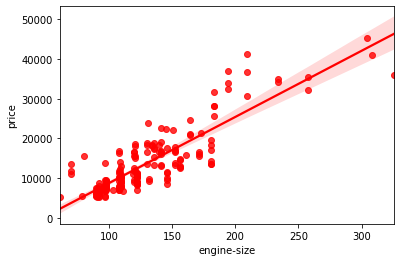

In [9]:
sns.regplot(data['engine-size'], data['price'], color='red')

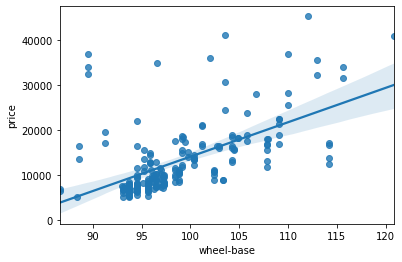

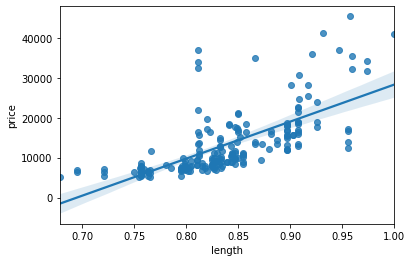

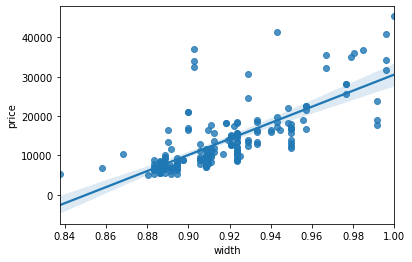

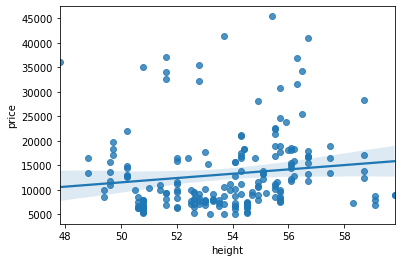

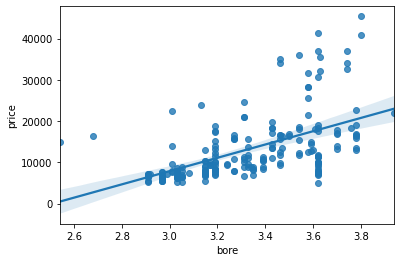

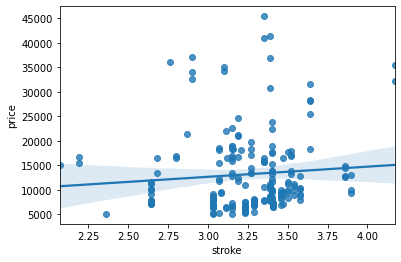

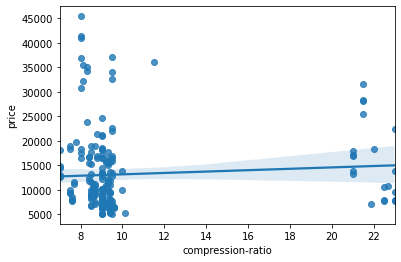

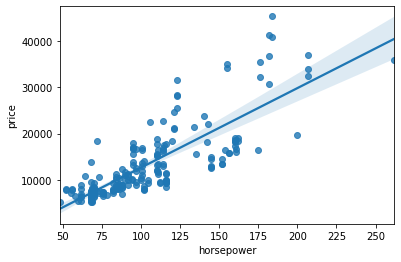

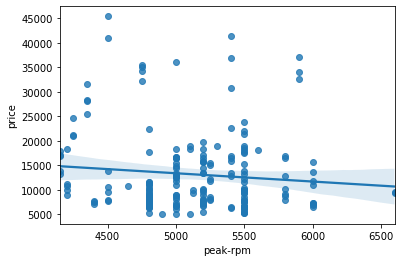

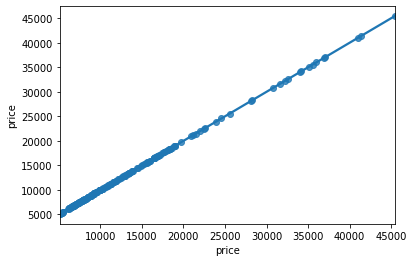

In [10]:
cols = data.select_dtypes('float64').columns

incr = 0
for col in range(1, len(cols)):
  sns.regplot(data[cols[incr]], data['price'])
  plt.show()
  incr += 1

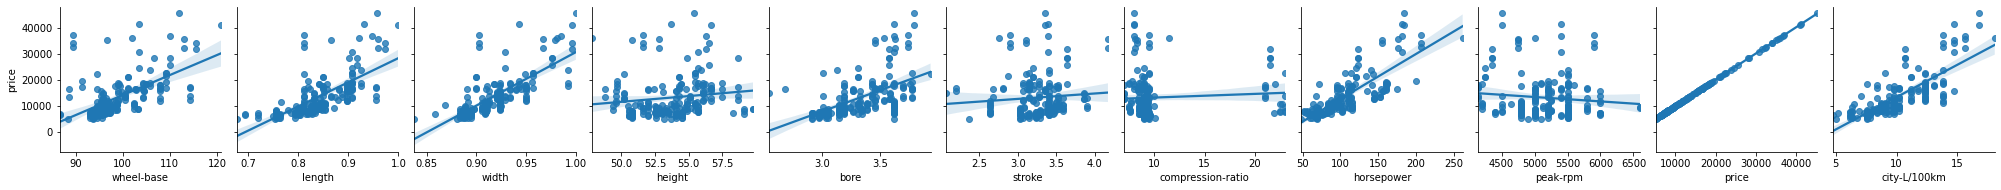

In [11]:
sns.pairplot(data, x_vars=data.select_dtypes('float64').columns, y_vars=['price'], kind='reg')

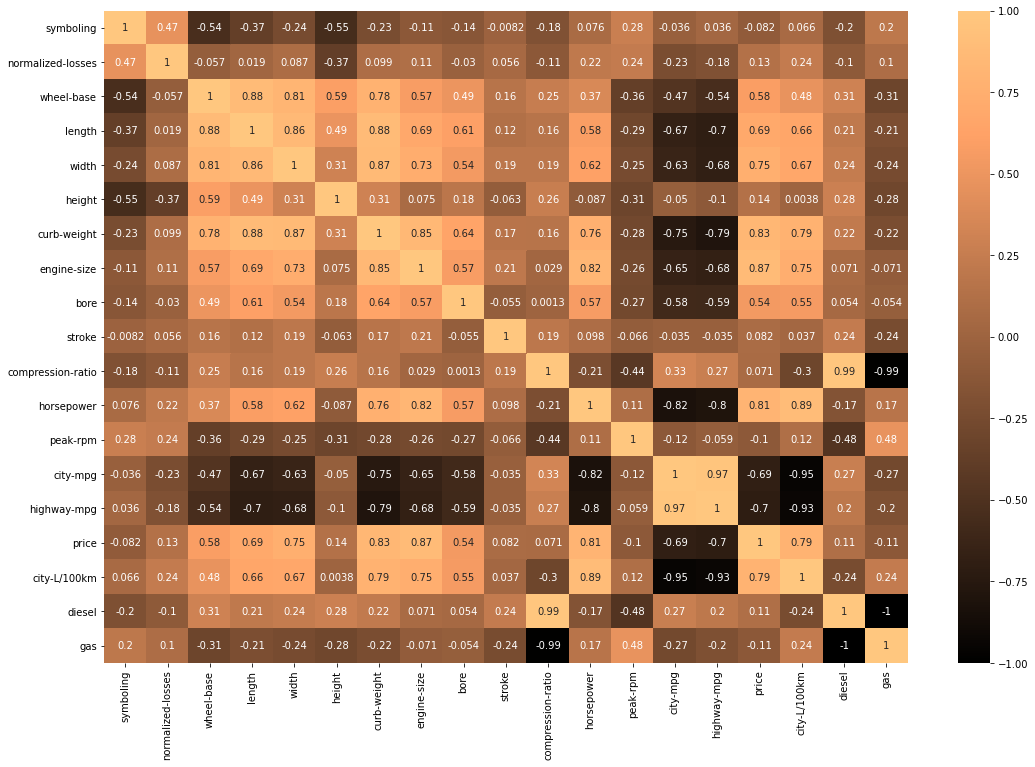

In [12]:
plt.figure(figsize=(18,12))
sns.heatmap(data.corr(),cmap="copper", annot=True)
plt.show()

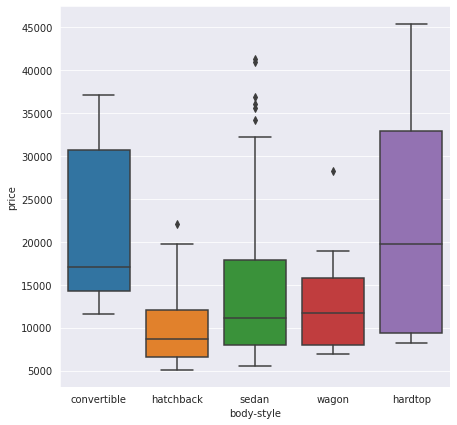

In [13]:
plt.figure(figsize=(7,7))
sns.set_style('darkgrid')
sns.boxplot(data['body-style'], data['price'])

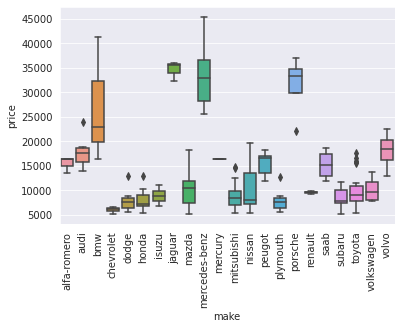

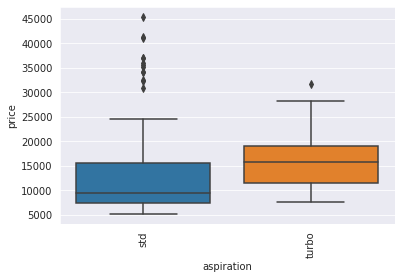

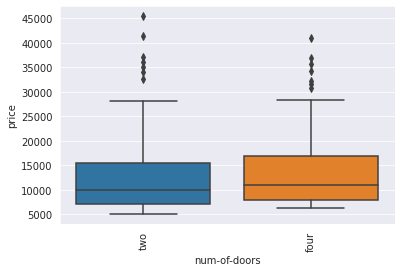

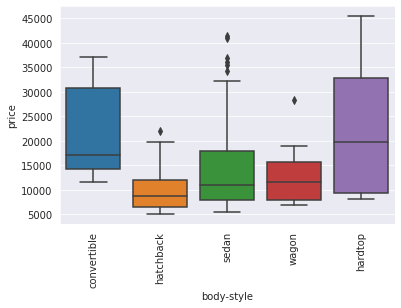

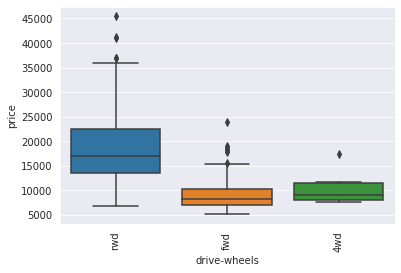

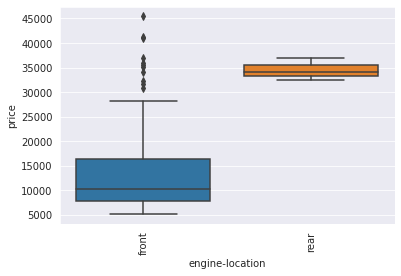

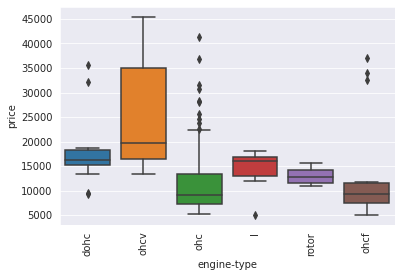

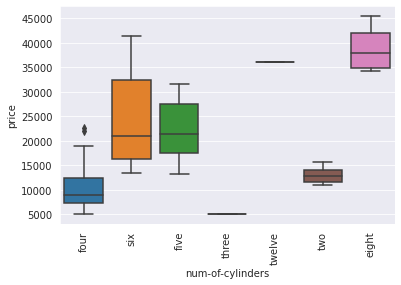

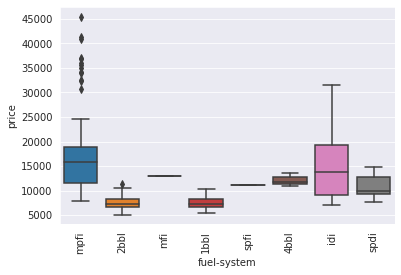

In [14]:
cols = data.select_dtypes('object').columns

incr = 0
for col in range(1, len(cols)):
  ax = sns.boxplot(data[cols[incr]], data['price'])
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
  plt.show()
  incr += 1

*** We can infer from the above boxplots that few of the variables are very tightly grouped wrt price column.
Also there are many outliers present which can easily be detected with the help of boxplots ***

In [15]:
data.select_dtypes('float64').describe()

,wheel-base,length,width,height,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km
count,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,98.797015,0.837102,0.915126,53.766667,3.330692,3.256904,10.164279,103.405534,5117.665368,13207.129353,9.944145
std,6.066366,0.059213,0.029187,2.447822,0.268072,0.319256,4.004965,37.365700,478.113805,7947.066342,2.534599
min,86.600000,0.678039,0.837500,47.800000,2.540000,2.070000,7.000000,48.000000,4150.000000,5118.000000,4.795918
25%,94.500000,0.801538,0.890278,52.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,7775.000000,7.833333
50%,97.000000,0.832292,0.909722,54.100000,3.310000,3.290000,9.000000,95.000000,5125.369458,10295.000000,9.791667
75%,102.400000,0.881788,0.925000,55.500000,3.580000,3.410000,9.400000,116.000000,5500.000000,16500.000000,12.368421
max,120.900000,1.000000,1.000000,59.800000,3.940000,4.170000,23.000000,262.000000,6600.000000,45400.000000,18.076923


In [16]:
data.select_dtypes('int64').describe()

,symboling,normalized-losses,curb-weight,engine-size,city-mpg,highway-mpg,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,2555.666667,126.875622,25.179104,30.686567,0.099502,0.900498
std,1.254802,31.99625,517.296727,41.546834,6.423220,6.815150,0.300083,0.300083
min,-2.000000,65.00000,1488.000000,61.000000,13.000000,16.000000,0.000000,0.000000
25%,0.000000,101.00000,2169.000000,98.000000,19.000000,25.000000,0.000000,1.000000
50%,1.000000,122.00000,2414.000000,120.000000,24.000000,30.000000,0.000000,1.000000
75%,2.000000,137.00000,2926.000000,141.000000,30.000000,34.000000,0.000000,1.000000
max,3.000000,256.00000,4066.000000,326.000000,49.000000,54.000000,1.000000,1.000000


In [17]:
data.select_dtypes('object').describe()

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [18]:
data.groupby('drive-wheels')['price'].mean()

drive-wheels
4wd    10241.000000
fwd     9244.779661
rwd    19757.613333
Name: price, dtype: float64

In [19]:
for col in cols:
  print(data.groupby(col)['price'].mean(), end='\n\n')
  

make
alfa-romero      15498.333333
audi             17859.166667
bmw              26118.750000
chevrolet         6007.000000
dodge             7875.444444
honda             8184.692308
isuzu             8916.500000
jaguar           34600.000000
mazda            10652.882353
mercedes-benz    33647.000000
mercury          16503.000000
mitsubishi        9239.769231
nissan           10415.666667
peugot           15489.090909
plymouth          7963.428571
porsche          31400.500000
renault           9595.000000
saab             15223.333333
subaru            8541.250000
toyota            9885.812500
volkswagen       10077.500000
volvo            18063.181818
Name: price, dtype: float64

aspiration
std      12542.181818
turbo    16254.805556
Name: price, dtype: float64

num-of-doors
four    13498.034783
two     12818.127907
Name: price, dtype: float64

body-style
convertible    21890.500000
hardtop        22208.500000
hatchback       9957.441176
sedan          14459.755319
wagon          

In [20]:
data.groupby(['drive-wheels', 'body-style'], sort=True)['price'].mean()

drive-wheels  body-style 
4wd           hatchback       7603.000000
              sedan          12647.333333
              wagon           9095.750000
fwd           convertible    11595.000000
              hardtop         8249.000000
              hatchback       8396.387755
              sedan           9811.800000
              wagon           9997.333333
rwd           convertible    23949.600000
              hardtop        24202.714286
              hatchback      14337.777778
              sedan          21711.833333
              wagon          16994.222222
Name: price, dtype: float64

**We can infer from above operation that hardtop from rwd drive style is the costliest of all body styles follwed by convertible from fwd drive style and finally sedan class from 4wd drive style of the respective body styles. We can also observe that rwd is the costliest drive wheel style amongst the all types**

In [21]:
data.reset_index().pivot_table(index='drive-wheels',columns='body-style')['price']

body-style,convertible,hardtop,hatchback,sedan,wagon
drive-wheels,,,,,
4wd,NaN,NaN,7603.000000,12647.333333,9095.750000
fwd,11595.0,8249.000000,8396.387755,9811.800000,9997.333333
rwd,23949.6,24202.714286,14337.777778,21711.833333,16994.222222


**This pivot table provides a tabular view for the above observation and we can clearly distinguish between the different body styles amongst all 3 drive wheel types**

In [22]:
data.reset_index().pivot_table(index='aspiration',columns='make')['price']

make,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
aspiration,,,,,,,,,,,,,,,,,,,,,,
std,15498.333333,16656.0,26118.75,6007.0,6900.000000,8184.692308,8916.5,34600.0,10652.882353,38900.0,NaN,7314.714286,9869.588235,14649.000000,7004.6,31400.5,9595.0,13642.5,7954.2,9859.612903,9759.0,16197.5
turbo,NaN,23875.0,NaN,NaN,9826.333333,NaN,NaN,NaN,NaN,28394.0,16503.0,11485.666667,19699.000000,16189.166667,10360.5,NaN,NaN,18385.0,11476.5,10698.000000,11670.0,20302.0


In [23]:
data.reset_index().pivot_table(index='engine-location',columns='engine-type')['price']

engine-type,dohc,l,ohc,ohcf,ohcv,rotor
engine-location,,,,,,
front,18116.416667,14627.583333,11567.358621,8541.25,25098.384615,13020.0
rear,NaN,NaN,NaN,34528.00,NaN,NaN


In [24]:
data.reset_index().pivot_table(index='fuel-system',columns='horsepower-binned')['price']

horsepower-binned,High,Low,Medium
fuel-system,,,
1bbl,NaN,7555.545455,NaN
2bbl,NaN,7433.203125,NaN
4bbl,NaN,12145.000000,NaN
idi,NaN,12047.800000,27209.200000
mfi,NaN,NaN,12964.000000
mpfi,25899.130435,11871.904762,15716.659574
spdi,NaN,NaN,10990.444444
spfi,NaN,11048.000000,NaN


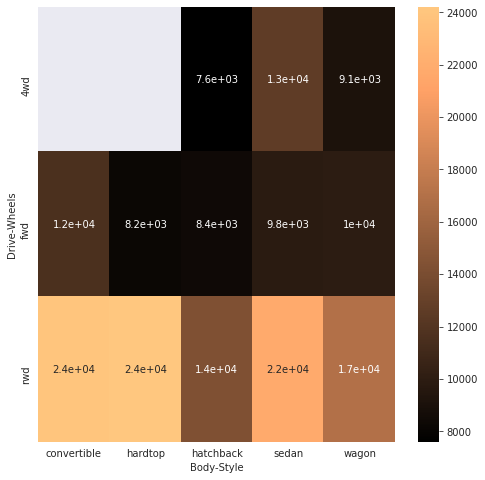

In [25]:
plt.figure(figsize=(8,8))
sns.heatmap(data.reset_index().pivot_table(index='drive-wheels',columns='body-style')['price'],cmap='copper', annot=True)
plt.xlabel('Body-Style')
plt.ylabel('Drive-Wheels')
plt.show()

In [26]:
from scipy.stats import pearsonr

corr, p = pearsonr(data['wheel-base'],data['price'])
print('Pearsons Correlation: %.3f' % corr)
print('P-Value: %.3f' % p, end='\n\n')

Pearsons Correlation: 0.585
P-Value: 0.000



Wheel base and price are positively correlated i.e. if price increases, then wheel-base will also increase

In [27]:
from scipy.stats import f_oneway
f_oneway(data['price'][data['drive-wheels'] == '4wd'],
         data['price'][data['drive-wheels'] == 'fwd'],
         data['price'][data['drive-wheels'] == 'rwd'])

F_onewayResult(statistic=67.95406500780399, pvalue=3.3945443577151245e-23)

We can infer from the above One Way Anova test that the the different drive wheel types are statistically significant with price variable